<a href="https://colab.research.google.com/github/nenarossbce/Project2/blob/main/Copy_of_Project_2_AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Predicting Adult Income

Nena Esaw

###**Goal:**

Predicting if an adult income will be greater than $50,000 based on occupation, education, age and other attributes.

###Data Dictionary
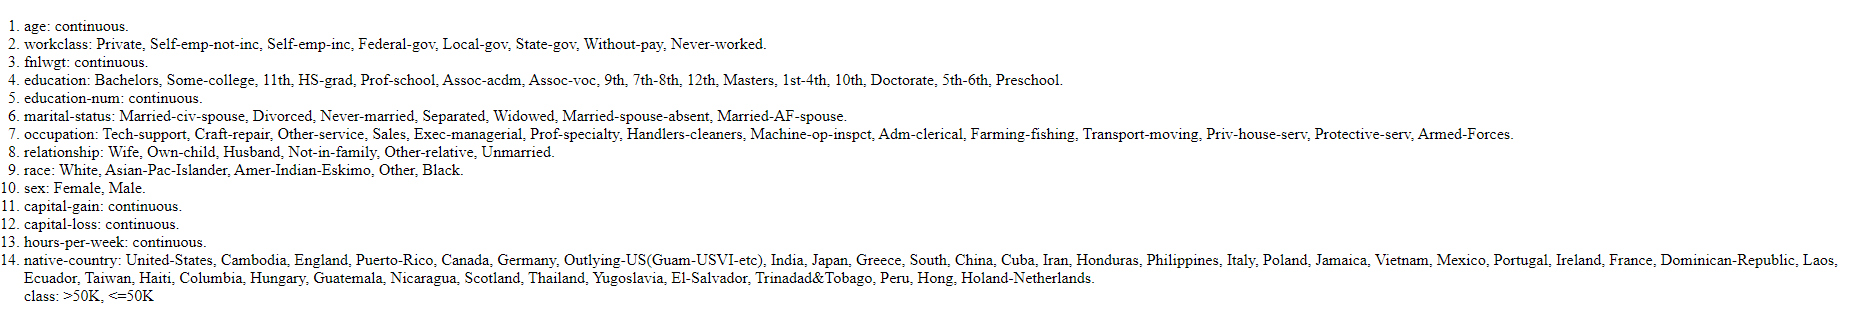

###Import libraries

In [ ]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
# SNS
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# Classification Metrics

from sklearn.metrics import (ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, f1_score, accuracy_score,
                             precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

###Import and Inspect Data

In [ ]:
fpath = '/content/drive/MyDrive/Colab Notebooks/Projects/adult.csv'
df = pd.read_csv(fpath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#Display rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 48842 rows, and 15 columns.


In [ ]:
#Display the column names, counts of non-null values and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###Clean Data

####Check for the duplicates

In [ ]:
#Check for duplicates
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicate rows')

There are 52 duplicate rows


In [ ]:
#Drop the dulicate rows
df = df.drop_duplicates()
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


####Check for Missing Values

In [ ]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


####Check for impossible values in numeric columns

In [ ]:
# Check for and address any impossible values in numeric columns.
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


* Capital-gain and capital-loss doesn't seem to have a lot of data.
* Fnlwgt might not add any value to our predications. We will need to explore this column more.  
* We also need to determine if there is a need for educational-num.

####Check for inconsistent values in categorical columns

In [ ]:
# Check for and address any inconsistent values in categorical columns.
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


* Native-Country has high cardinality and can be dropped

####Drop columns

In [ ]:
#Drop columns
df.drop (['native-country','capital-loss', 'capital-gain'], axis=1, inplace =True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,<=50K


In [ ]:
#Identify string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'income'],
      dtype='object')

In [ ]:
#Obtain the value count for all string columns
for col in string_cols:
  print(f'Value counts for {col}')
  print(df[col].value_counts())
  print ('\n')

Value counts for workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value counts for education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


Value counts for marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value coun

####Remove the "?" in Occupation and Workclass

In [ ]:
#Look a value counts for Occupation
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#Change ? to NaN
df['occupation'].replace({'?':'Unspecified'}, inplace=True)
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Unspecified          2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#Check value counts for Workclass
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
#Change ? to NaN
df['workclass'].replace({'?':'Unspecified'}, inplace=True)
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unspecified          2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

###Explore the Data

####Define a function that will be used to explore categorical features

In [ ]:
# Function to explore all categorical features
def explore_categorical(df, x, figsize = (6,6)):
   # Before filling nulls, save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
   # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



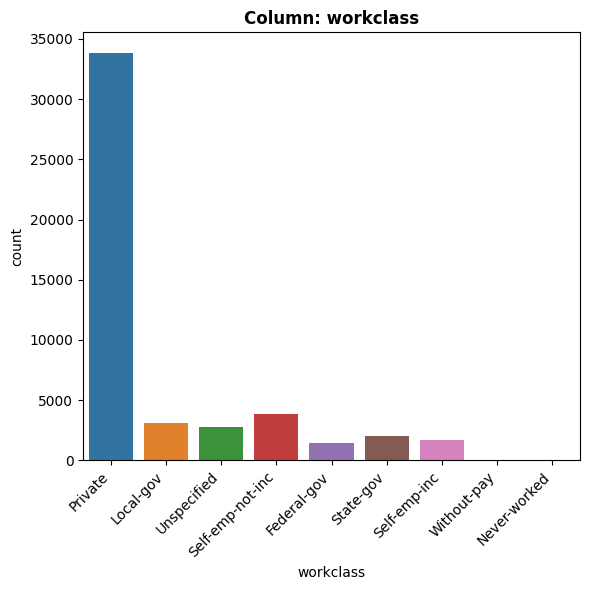

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: 'Private' occurs 33860 times (69.4%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'workclass');

In [ ]:
# Values we want to remove --> any values that have less than 3%

education_rows = ['7th-8th','5th-6th','9th', '12th', '11th', '10th', '1st-4th','Preschool']
#drop rows that contain any value in the list

df = df[df['education'].isin(education_rows) == False]

#education_rows = ['HS-grad', 'Assoc-acdm','Some-college', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']


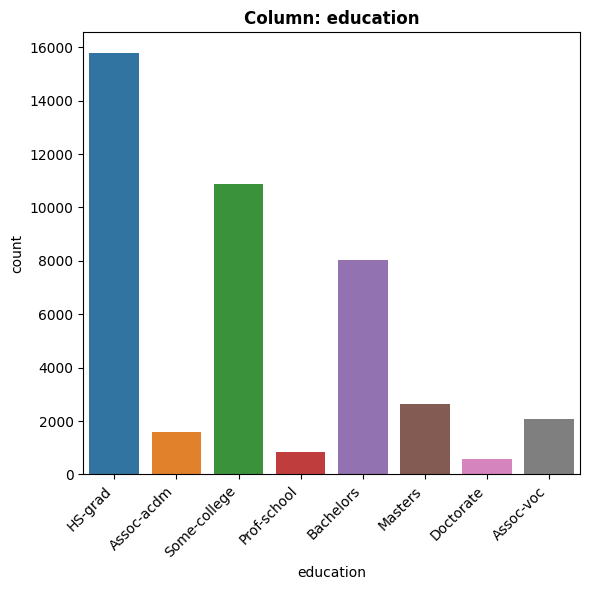

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: 'HS-grad' occurs 15770 times (37.2%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'education');

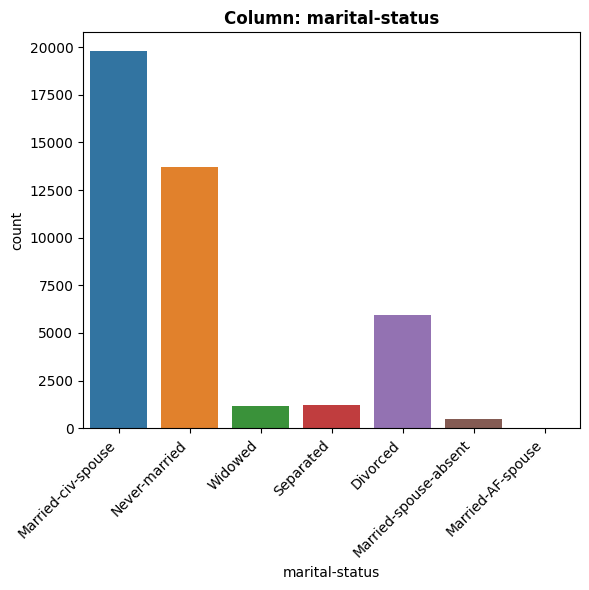

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 19782 times (46.67%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'marital-status');

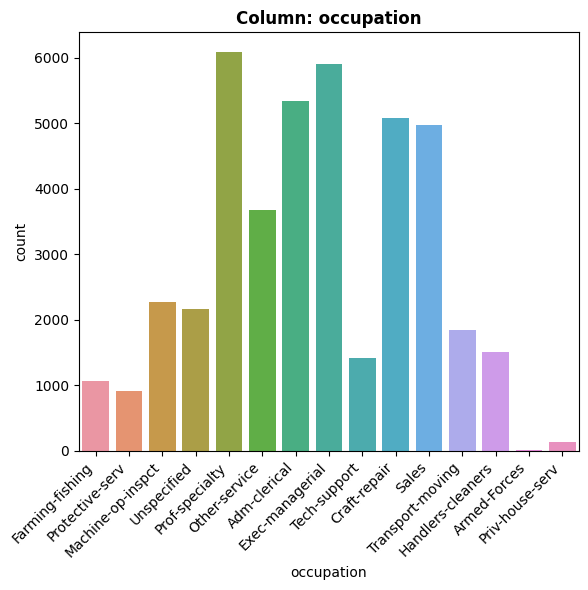

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: 'Prof-specialty' occurs 6080 times (14.34%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'occupation');

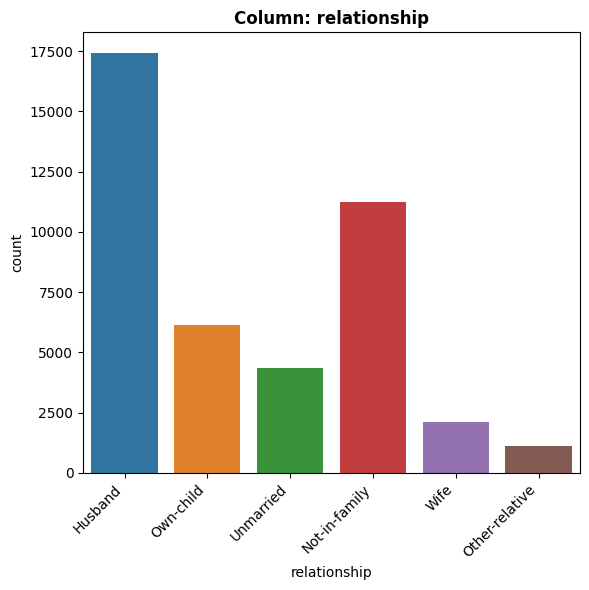

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 17408 times (41.07%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'relationship');

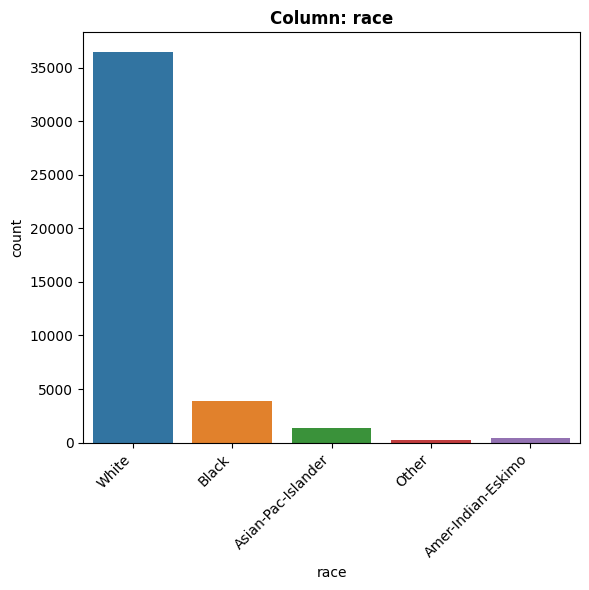

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 36464 times (86.02%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'race');

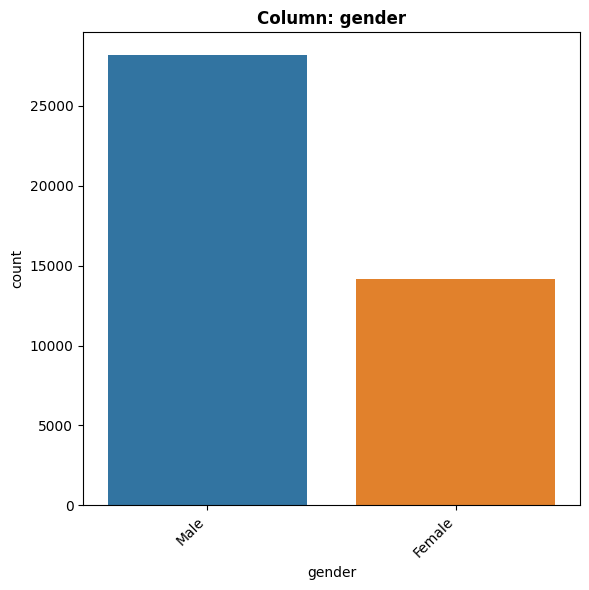

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 28201 times (66.53%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'gender');

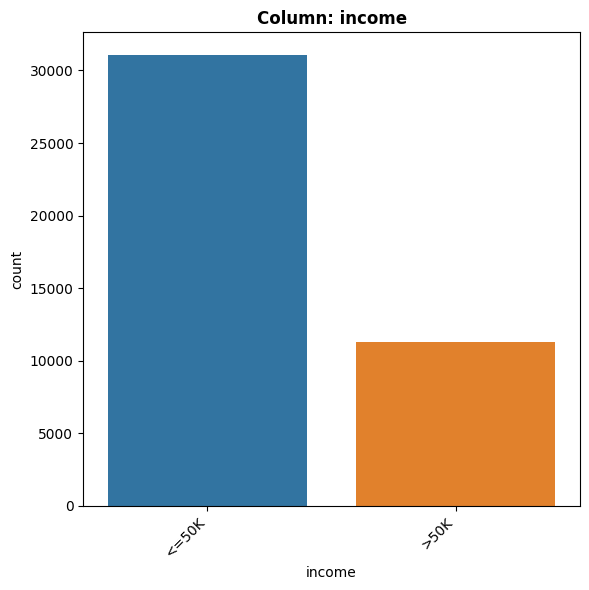

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '<=50K' occurs 31076 times (73.31%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'income');

####Define a function that will be used to explore numeric features

In [ ]:
def explore_numeric(df, x, figsize=(6,4) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

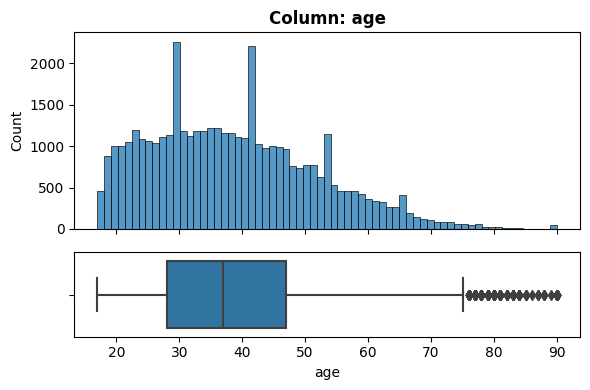

- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df, 'age');

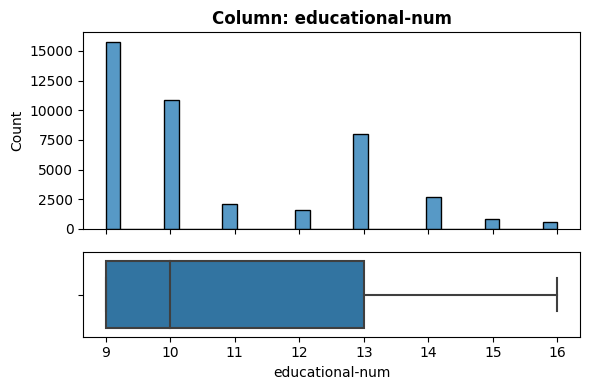

- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df, 'educational-num');

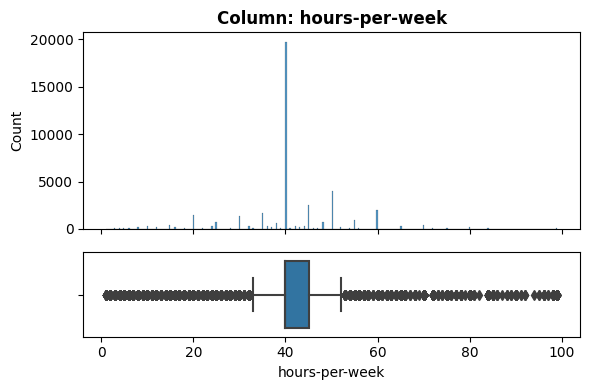

- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df, 'hours-per-week');

###Identifying correlations between target and features

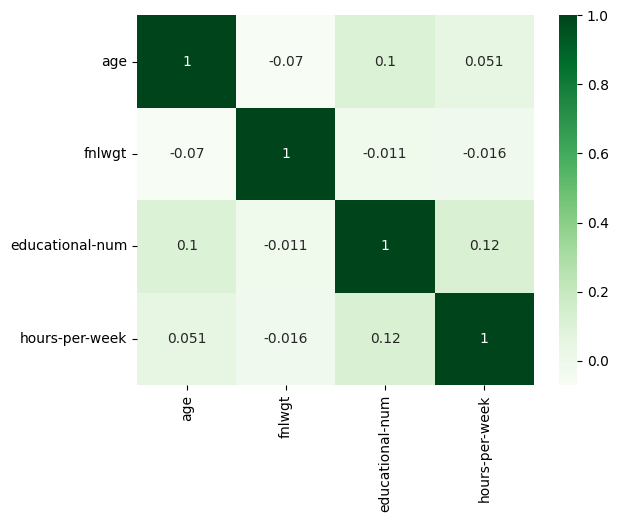

In [ ]:
#Using a heatmap to determine numerical correlations
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap = 'Greens', annot = True);

* We can determine from this heatmap that are no correlations with the numerical values.

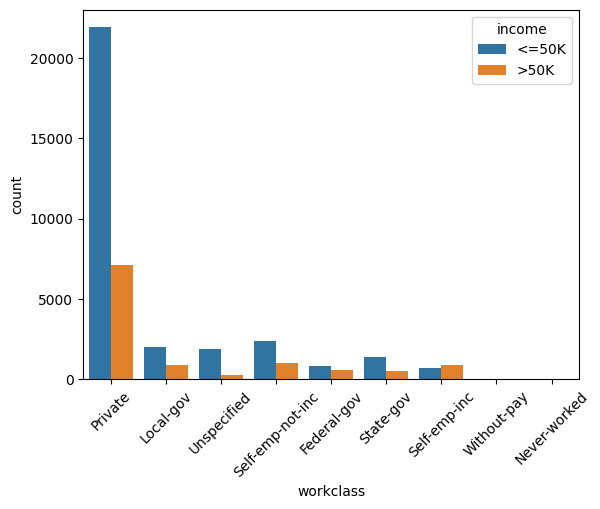

In [ ]:
ax = sns.countplot(data=df, x='workclass', hue='income')
ax.tick_params(axis='x', rotation = 45);

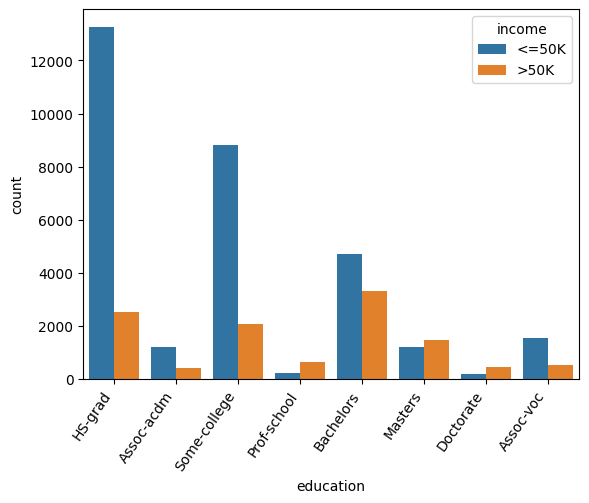

In [ ]:
ax = sns.countplot(data=df, x='education', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha='right');

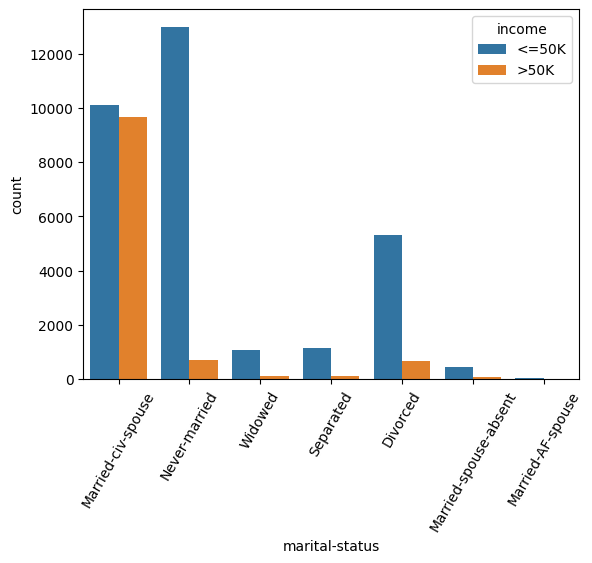

In [ ]:
ax = sns.countplot(data=df, x='marital-status', hue='income')
ax.tick_params(axis='x', rotation = 60);

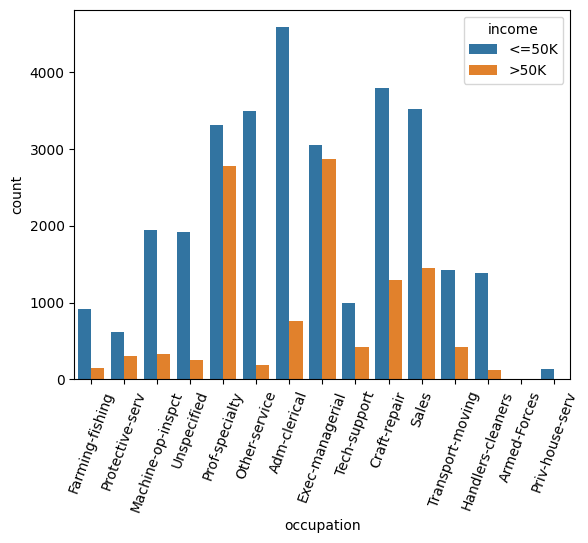

In [ ]:
ax = sns.countplot(data=df, x='occupation', hue='income')
ax.tick_params(axis='x', rotation = 70);

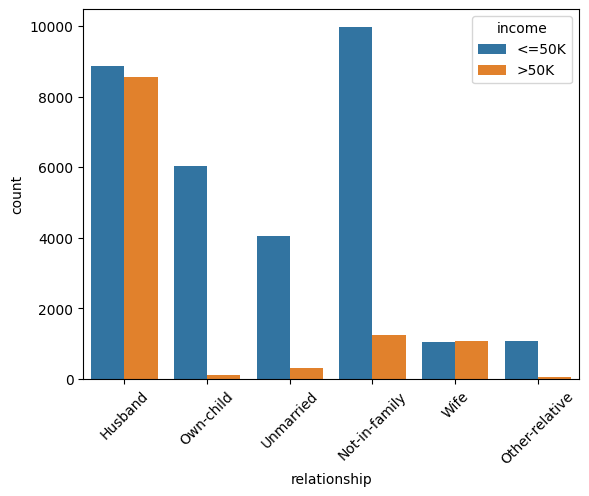

In [ ]:
ax = sns.countplot(data=df, x='relationship', hue='income')
ax.tick_params(axis='x', rotation = 45);

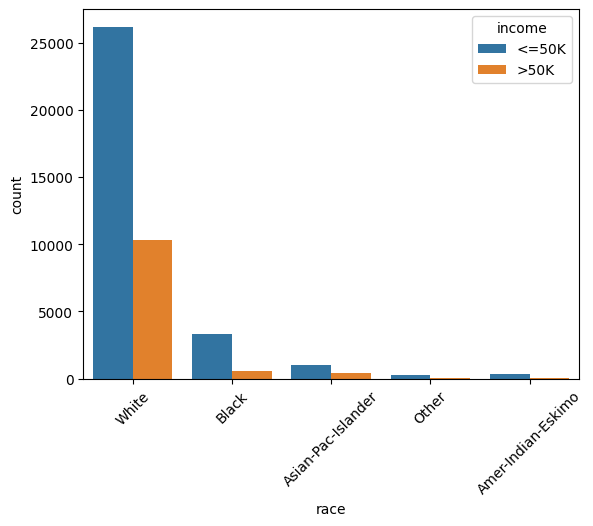

In [ ]:
ax = sns.countplot(data=df, x='race', hue='income')
ax.tick_params(axis='x', rotation = 45);

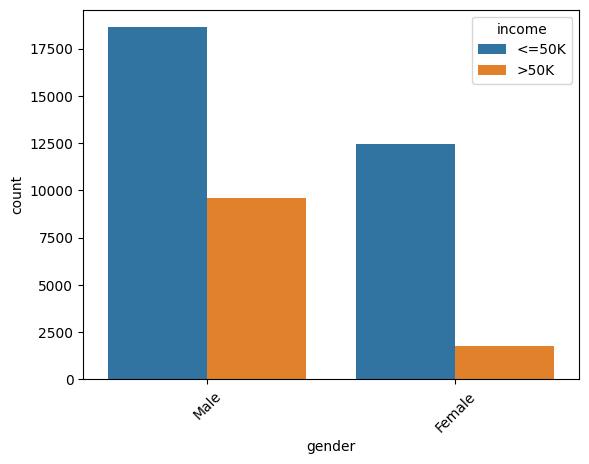

In [ ]:
ax = sns.countplot(data=df, x='gender', hue='income')
ax.tick_params(axis='x', rotation = 45);

###Visualaztions that demostrate key trends with income

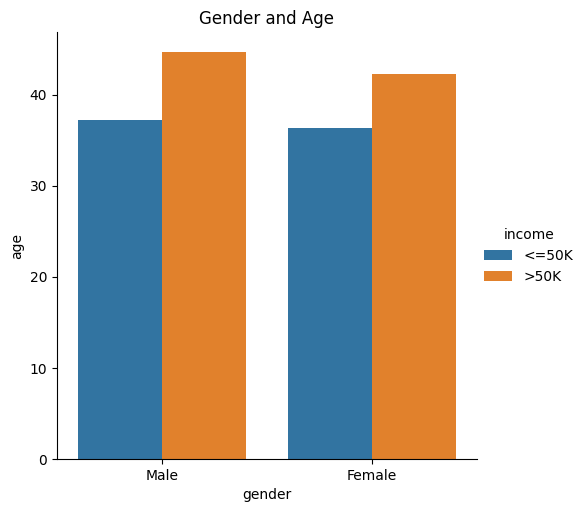

In [ ]:
sns.catplot(data=df, x="gender", y="age", hue="income", kind="bar", errorbar=None).set(title='Gender and Age');


* We can see that more male over the age of 40 generate a higher income over 50k than compared to females.
* Females over the age 40 make over 50k as well but not as much as males.
* We can determine that over the over of 40 for both male and females they generate a higher income.

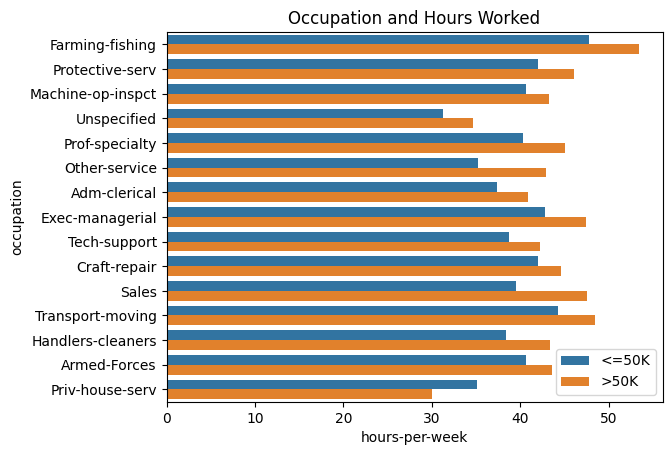

In [ ]:
ax = sns.barplot(data=df, y ='occupation', x='hours-per-week', hue='income', errorbar= None).set(title='Occupation and Hours Worked')
plt.legend(loc='lower right');

* This graph shows up that Farming-fishing occupation generates the highest income and work more than 50 hours per week.
* We can also see that a majority of the work class that work over 40 hours per week generate over 50k income.

##Modeling


###Prepare the data appropriately for modeling

####Make a copy of the data

In [ ]:
#Make a copy
df_ml = df.copy()
df_ml.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


####Handle duplicates

In [ ]:
df_ml.drop_duplicates(inplace=True)
df_ml.duplicated().sum()
print(f'There are {df_ml.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


####Missing Values

In [ ]:
# Display the total number of missing values
print(f'There are {df_ml.isna().sum().sum()} missing values.')

There are 0 missing values.


####Remove the "?" in Occupation and Workclass

In [ ]:
#Change ? to NaN
df_ml['occupation'].replace({'?':'Unspecified'}, inplace=True)
df_ml['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Unspecified          2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#Change ? to NaN
df_ml['occupation'].replace({'?':'Unspecified'}, inplace=True)
df_ml['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Unspecified          2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

####Split the Data

In [ ]:
#Create features matrix and target vector
target = 'income'
X = df_ml.drop(columns = [target]).copy()
y = df_ml[target].copy()

####Check the class balance

In [ ]:
# Check how many samples of each class are present
df_ml['income'].value_counts(normalize=False)

<=50K    37109
>50K     11681
Name: income, dtype: int64

####Dropping unwanted columns

* To help us determine the income we will drop the the following columns:
  * Native-Country due to high cardinality
  * Capital-loss and capital gain has a lot of missing data
  * Educational-num is the numerical values for education
  * Fnlwgt doesn't add in value in predicting our target
  * Relationship seems very similar to martial-status

In [ ]:
#Drop unwanted columns
bad_cols = ['native-country','capital-loss', 'capital-gain', 'educational-num', 'fnlwgt', 'relationship']
X = X.drop(columns=bad_cols)
X.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40
4,18,?,Some-college,Never-married,Unspecified,White,Female,30


Train Test Split

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

####Preprocessing

Numeric


In [ ]:
# Numerical Prepprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns

# instantiate preprocessors
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)

# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['age', 'hours-per-week'], dtype='object'))

Nominal

In [ ]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns

# Instantiate the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)

# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
        'gender'],
       dtype='object'))

Column Transformer

In [ ]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)

##Create and compare multiple model types to predict the income

Custom Function to evaluate the classification metrics

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

###KNN Model

In [ ]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()

In [ ]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hours-per-week'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.92     27831
        >50K       0.75      0.69      0.72      8761

    accuracy                           0.87     36592
   macro avg       0.83      0.81      0.82     36592
weighted avg       0.87      0.87      0.87     36592



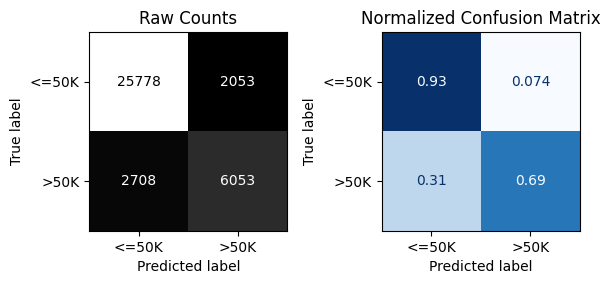


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      9278
        >50K       0.62      0.59      0.60      2920

    accuracy                           0.82     12198
   macro avg       0.75      0.74      0.74     12198
weighted avg       0.81      0.82      0.81     12198



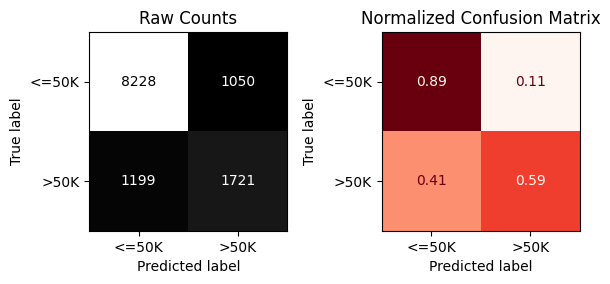

In [ ]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

###GridSearchCV with KNN model

In [ ]:
# Get list of params for the knn model pipeline
knn_pipe.get_params()

In [ ]:
# Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [ ]:
params={'kneighborsclassifier__n_neighbors': nneighbors_list}
      # Instantiate GS with scoring = 'recall_macro' and return_train_score = True
knn_gs = GridSearchCV(knn_pipe, params,verbose=True, n_jobs=-1, cv=3,
                  return_train_score=True,scoring='recall_macro')
# Fit the gridsearch on the training data
knn_gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hours-per-week'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9,
                                                               11, 13, 15, 17,
                                                               19, 21, 23, 25,
                                                               27, 29, 31]},
             return_train_score=True, scoring='recall_macro', verbose=True)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90     27831
        >50K       0.71      0.64      0.68      8761

    accuracy                           0.85     36592
   macro avg       0.80      0.78      0.79     36592
weighted avg       0.85      0.85      0.85     36592



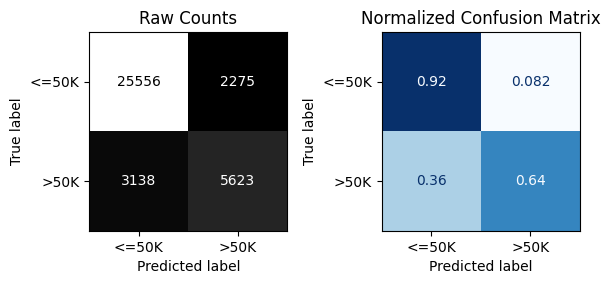


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      9278
        >50K       0.65      0.59      0.62      2920

    accuracy                           0.83     12198
   macro avg       0.76      0.74      0.75     12198
weighted avg       0.82      0.83      0.82     12198



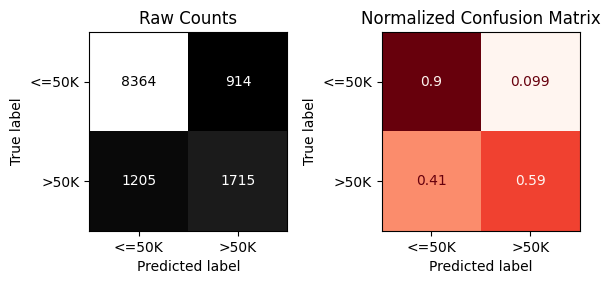

In [ ]:
# Evaluate the  model
evaluate_classification(knn_gs, X_train, y_train, X_test, y_test)

###Logistic Regression Model

In [ ]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(random_state=42)
#Make pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)

In [ ]:
#Fit the moel on the training data
logreg_pipe.fit(X_train, y_train)


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     27831
        >50K       0.70      0.55      0.61      8761

    accuracy                           0.83     36592
   macro avg       0.78      0.74      0.75     36592
weighted avg       0.83      0.83      0.83     36592



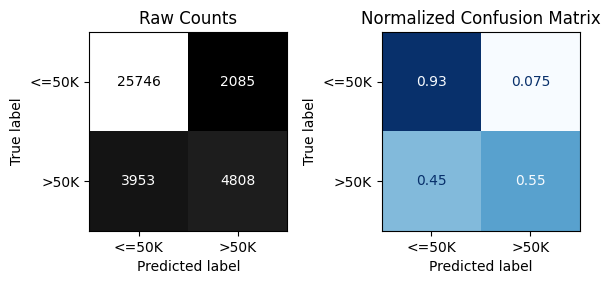


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      9278
        >50K       0.69      0.55      0.61      2920

    accuracy                           0.83     12198
   macro avg       0.78      0.74      0.75     12198
weighted avg       0.83      0.83      0.83     12198



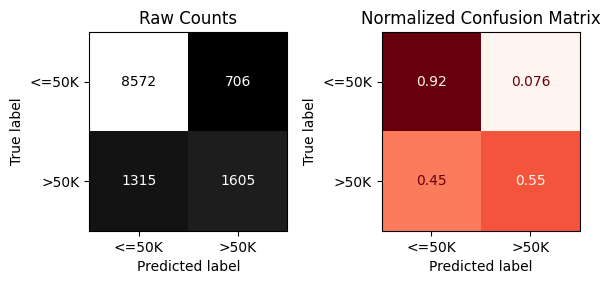

In [ ]:
# Evaluate the  model
evaluate_classification(logreg_pipe, X_train, y_train, X_test, y_test)

###GridSearchCV for Logistice Regression Model

In [ ]:
# Making a logreg pipe that uses L1 regularization
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(solver='liblinear',
                                                       penalty='l1',
                                                       random_state=42))
# Get list of params for the knn model pipeline
logreg_pipe.get_params()

In [ ]:
# Define the param grid
params={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Create the GridSearchCV object with required args
logreg_gs = GridSearchCV(logreg_pipe, params, verbose=True, n_jobs=-1, cv =3,
                  return_train_score=True,scoring='recall_macro')
# Fit the gridsearch and display best params
logreg_gs.fit(X_train, y_train)
print(f'Best Params: {logreg_gs.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'logisticregression__C': 100}


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89     27831
        >50K       0.70      0.55      0.61      8761

    accuracy                           0.83     36592
   macro avg       0.78      0.74      0.75     36592
weighted avg       0.83      0.83      0.83     36592



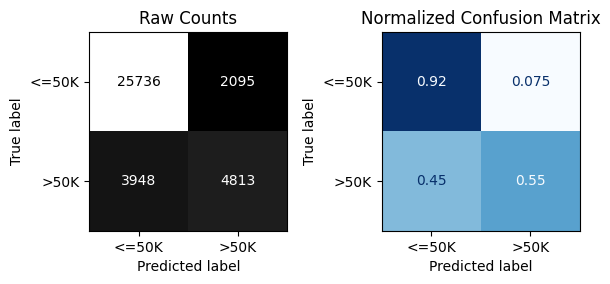


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      9278
        >50K       0.70      0.55      0.62      2920

    accuracy                           0.83     12198
   macro avg       0.78      0.74      0.76     12198
weighted avg       0.83      0.83      0.83     12198



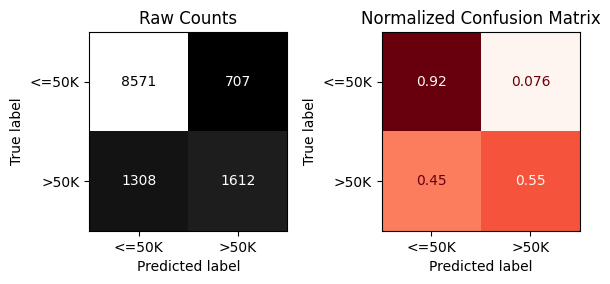

In [ ]:
# Evaluate the default model
evaluate_classification(logreg_gs, X_train, y_train, X_test, y_test)